In [2]:
# import required packages and modules
import os
import sys
sys.path.insert(0,'../scripts/') 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#
import pickle
#
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly. graph_objects as go
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist


In [3]:
# importing scrpts files from the script folder
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from user_overview import UserOverview
from data_cleaning import DataFrameCleaning
from data_info import DataFrameInfo
from data_outliers import *
from plots import *

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
# Loading Telecom dataset(USer_Engagment and Experience data) 

user_engagement  = pd.read_csv('../data/user_engagement.csv')
user_experience = pd.read_csv('../data/user_experiance.csv')

In [6]:
# to display the top user engagement dataset
user_engagement.head()

Customer_Id  Cluster  Session_Frequency  Duration  Total_Data_Volume
0 33601001722.00        3                  1 116720.00       878690574.00
1 33601001754.00        2                  1 181230.00       156859643.00
2 33601002511.00        2                  1 134969.00       595966483.00
3 33601007832.00        1                  1  49878.00       422320698.00
4 33601008617.00        3                  2  37104.00      1457410944.00

In [7]:
# to display the top user experience dataset
user_experience.head()

MSISDN_Number  Cluster  Total_Avg_RTT  Total_Avg_Bearer_TP  Total_Avg_TCP
0 33601001722.00        1           0.05                76.00        1116.01
1 33601001754.00        1           0.03                99.00        1116.01
2 33601002511.00        1           0.05                97.00        1116.01
3 33601007832.00        1           0.08               248.00         587.21
4 33601008617.00        0           0.12             56844.00        1119.51

In [8]:
# let rename MSISDN_Number to Customer_Id
user_experience.rename(columns = {'MSISDN_Number':'Customer_Id'}, inplace=True)
user_experience.head()#dispaling after rename done

Customer_Id  Cluster  Total_Avg_RTT  Total_Avg_Bearer_TP  Total_Avg_TCP
0 33601001722.00        1           0.05                76.00        1116.01
1 33601001754.00        1           0.03                99.00        1116.01
2 33601002511.00        1           0.05                97.00        1116.01
3 33601007832.00        1           0.08               248.00         587.21
4 33601008617.00        0           0.12             56844.00        1119.51

## **Task 5** - User Satisifaction Analysis
 Based on the Engagement Analysis and the Experience Analysis we have conducted in previous tasks, we will analyze the User Satisifaction in this task.
##### **Task 5.1.** - Write a python program to assign:
    a.  An engagement score to each user, and
    b. An experience score to each user

#  
    a. Assign User Engagement Score

In [9]:
# loading the saved user engagement_model from models folder

with open("../models/user_engagement.pkl", "rb") as f:
    kmeans1 = pickle.load(f)
less_engaged_score = 3

In [10]:
engagement_data = user_engagement.set_index('Customer_Id')[
    ['Duration', 'Total_Data_Volume', 'Session_Frequency']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(engagement_data)
pd.DataFrame(scaled_array).head(5)

0     1     2
0 -0.09  0.20 -0.23
1  0.38 -0.58 -0.23
2  0.04 -0.11 -0.23
3 -0.57 -0.29 -0.23
4 -0.66  0.82  0.34

In [11]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

0     1     2
0 -0.27  0.64 -0.72
1  0.52 -0.80 -0.31
2  0.18 -0.42 -0.89
3 -0.84 -0.43 -0.34
4 -0.59  0.74  0.31

In [12]:
distance = kmeans1.fit_transform(data_normalized)
distance_from_less_engaged_score = list(
    map(lambda x: x[less_engaged_score], distance))
user_engagement['Engagement_Score'] = distance_from_less_engaged_score
user_engagement.head(5)

Customer_Id  Cluster  Session_Frequency  Duration  Total_Data_Volume  Engagement_Score
0 33601001722.00        3                  1 116720.00       878690574.00              0.80
1 33601001754.00        2                  1 181230.00       156859643.00              1.61
2 33601002511.00        2                  1 134969.00       595966483.00              1.24
3 33601007832.00        1                  1  49878.00       422320698.00              0.59
4 33601008617.00        3                  2  37104.00      1457410944.00              0.90

# 
    b.Assign User Experience Score

In [13]:
# loading the saved user engagement model form the model folder

with open("../models/user_experiance.pkl", "rb") as f:
    kmeans2 = pickle.load(f)
worst_experience = 0

In [14]:
experience_df = user_experience.set_index('Customer_Id')[
    ['Total_Avg_RTT', 'Total_Avg_Bearer_TP', 'Total_Avg_TCP']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(experience_df)
pd.DataFrame(scaled_array).head(5)

0     1     2
0 -0.69 -0.66 -0.48
1 -0.93 -0.66 -0.48
2 -0.62 -0.66 -0.48
3 -0.08 -0.66 -0.90
4  0.47  1.78 -0.48

In [15]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

0     1     2
0 -0.64 -0.62 -0.45
1 -0.75 -0.54 -0.39
2 -0.61 -0.64 -0.47
3 -0.07 -0.59 -0.81
4  0.25  0.94 -0.25

In [16]:
experience_data = user_experience.set_index('Customer_Id')
distance = kmeans2.fit_transform(data_normalized)
distance_from_worst_experience = list(
    map(lambda x: x[worst_experience], distance))
user_experience['Experience_Score'] = distance_from_worst_experience
user_experience.head(5)

Customer_Id  Cluster  Total_Avg_RTT  Total_Avg_Bearer_TP  Total_Avg_TCP  Experience_Score
0 33601001722.00        1           0.05                76.00        1116.01              1.58
1 33601001754.00        1           0.03                99.00        1116.01              1.58
2 33601002511.00        1           0.05                97.00        1116.01              1.57
3 33601007832.00        1           0.08               248.00         587.21              1.41
4 33601008617.00        0           0.12             56844.00        1119.51              0.51

##### **Task 4.2** - Consider the average of both Engagement & Experience Scores as  the satisfaction score & report the top 10 satisfied customers

In [17]:
user_id_engagement = user_engagement['Customer_Id'].values
user_id_experiance = user_experience['Customer_Id'].values
user_intersection = list(set(user_id_engagement).intersection(user_id_experiance))
user_intersection[:10]

[33662697474.0,
 33665581058.0,
 33628094468.0,
 33666105351.0,
 33782497288.0,
 33661386761.0,
 33620754445.0,
 33643560974.0,
 33761525777.0,
 33604501524.0]

In [18]:
# to check the shape of the dataset user_engagement
user_engagement_data = user_engagement[user_engagement['Customer_Id'].isin(user_intersection)]
user_engagement_data.shape

(106471, 6)

In [19]:
# to check the shape of user_experience
user_experience_data = user_experience[user_experience['Customer_Id'].isin(
    user_intersection)]
user_experience_data.shape

(106471, 6)

In [20]:
# Combine Engagement and Experience score to get the user Satisfaction Score

user_data = pd.merge(user_engagement_data, user_experience_data, on='Customer_Id')
user_data['Satisfaction_Score'] = (
    user_data['Engagement_Score'] + user_data['Experience_Score'])/2
user_data.head(10)

Customer_Id  Cluster_x  Session_Frequency  Duration  Total_Data_Volume  Engagement_Score  Cluster_y  Total_Avg_RTT  Total_Avg_Bearer_TP  Total_Avg_TCP  Experience_Score  Satisfaction_Score
0 33601001722.00          3                  1 116720.00       878690574.00              0.80          1           0.05                76.00        1116.01              1.58                1.19
1 33601001754.00          2                  1 181230.00       156859643.00              1.61          1           0.03                99.00        1116.01              1.58                1.59
2 33601002511.00          2                  1 134969.00       595966483.00              1.24          1           0.05                97.00        1116.01              1.57                1.41
3 33601007832.00          1                  1  49878.00       422320698.00              0.59          1           0.08               248.00         587.21              1.41                1.00
4 33601008617.00          3                  2  37104.00      1457410944.00              0.90          0           0.12             56844.00        1119.51              0.51                0.71
5 33601010682.00          0                  2 253983.00       615217221.00              1.87          1           0.07              7908.00        1223.31              1.50                1.69
6 33601011634.00          0                  2 128360.00       654723066.00              1.57          2           0.05             42513.00        3906.04              1.06                1.32
7 33601011959.00          1                  1  86399.00       332660357.00              0.90          1           0.05              1247.00         128.17              1.43                1.16
8 33601014694.00          0                  2 242249.00       990132189.00              1.81          2           0.10               189.00        3906.04              1.32                1.56
9 33601020306.00          3                  1 124854.00       732463761.00              0.92          1           0.06               146.00        1116.01              1.56                1.24

In [21]:
# companing score
sat_score_data = user_data[['Customer_Id', 'Engagement_Score',
                        'Experience_Score', 'Satisfaction_Score']]
sat_score_data = sat_score_data.set_index('Customer_Id')
sat_score_data.head(10)

Engagement_Score  Experience_Score  Satisfaction_Score
Customer_Id                                                           
33601001722.00              0.80              1.58                1.19
33601001754.00              1.61              1.58                1.59
33601002511.00              1.24              1.57                1.41
33601007832.00              0.59              1.41                1.00
33601008617.00              0.90              0.51                0.71
33601010682.00              1.87              1.50                1.69
33601011634.00              1.57              1.06                1.32
33601011959.00              0.90              1.43                1.16
33601014694.00              1.81              1.32                1.56
33601020306.00              0.92              1.56                1.24

In [22]:
sorted_by_satisfaction = sat_score_data.sort_values('Satisfaction_Score', ascending=False)
sat_top_10 = sorted_by_satisfaction['Satisfaction_Score'].head(10)
sat_top_10

Customer_Id
33663323858.00   1.75
33615304826.00   1.75
33684907551.00   1.75
33786254528.00   1.74
33667483944.00   1.74
33606975444.00   1.74
33618304191.00   1.74
33762572632.00   1.74
33603759473.00   1.74
33661859966.00   1.74
Name: Satisfaction_Score, dtype: float64

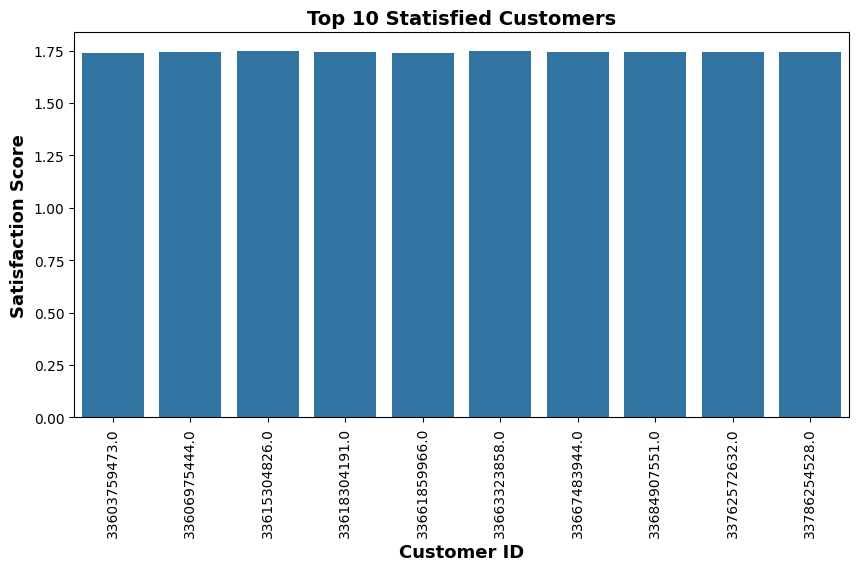

In [23]:
# displaying top 10 satisfied customers ba bar graph
plot_bar(sat_top_10, 'Top 10 Statisfied Customers', 'Customer ID', 'Satisfaction Score')

#### **Task 4.3** - Building a Regression Model

In [24]:
# importing library
from sklearn import model_selection,tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
# spliting datset as training and testing dataset
seed=42   
X = sat_score_data[['Engagement_Score', 'Experience_Score']]
y = sat_score_data[['Satisfaction_Score']]

#splitied data to test and train datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
kfold = model_selection.KFold(n_splits=10, random_state=None)

In [32]:

model=tree.DecisionTreeRegressor()


In [27]:
#Calculating Mean Squared Error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())

Mean Absolute Error:  -0.0016690651515224157
Standard Deviation:  1.7421570684677833e-05


In [28]:
#Calculating Mean Squared Error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print()
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())


Mean Absolute Error:  -0.0016646324588994502
Standard Deviation:  1.9460250676825865e-05


In [30]:
#Calculating R Squared Value
scoring = "r2"
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print()
print("Mean squared Error: ", results.mean())
print("Standard Deviation: ", results.std())



Mean squared Error:  0.9999295144098351
Standard Deviation:  1.910035873571385e-06


In [31]:
linear_reg = LinearRegression()
models = linear_reg.fit(X_train, y_train)
pred

NameError: name 'pred' is not defined

In [33]:
print('Coefficients: \n', model.coef_)
print()
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % model.score(X_test, y_test))
print 

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

### **Task 4.4** - Run a K-Means (k=2) on the Engagement & the Experience Score

In [34]:
user_satisfaction_data = user_data[['Customer_Id', 'Engagement_Score', 'Experience_Score']].copy()
user_satisfaction_data = user_satisfaction_data.set_index('Customer_Id')
user_satisfaction_data.head(5)

Engagement_Score  Experience_Score
Customer_Id                                       
33601001722.00              0.80              1.58
33601001754.00              1.61              1.58
33601002511.00              1.24              1.57
33601007832.00              0.59              1.41
33601008617.00              0.90              0.51

<Axes: >

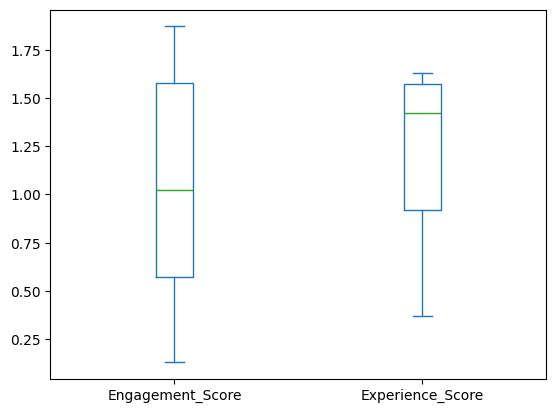

In [35]:
user_satisfaction_data.plot.box()

<Axes: >

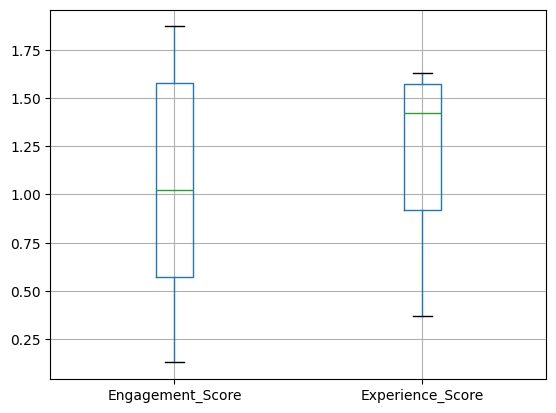

In [36]:
# Remove Outliers from Experience Score

replace_outliers_with_iqr(user_satisfaction_data, ['Experience_Score'])
user_satisfaction_data.boxplot()

In [37]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_satisfaction_data)
scaled_array
pd.DataFrame(scaled_array).head(5)

0     1
0 -0.45  0.93
1  1.05  0.93
2  0.37  0.92
3 -0.85  0.47
4 -0.26 -1.94

In [38]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

0     1
0 -0.44  0.90
1  0.75  0.66
2  0.37  0.93
3 -0.87  0.49
4 -0.13 -0.99

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_normalized)

In [40]:
user_satisfaction_data.insert(0, 'Cluster', kmeans.labels_)
user_satisfaction_data.head(5)

Cluster  Engagement_Score  Experience_Score
Customer_Id                                                
33601001722.00        1              0.80              1.58
33601001754.00        1              1.61              1.58
33601002511.00        1              1.24              1.57
33601007832.00        1              0.59              1.41
33601008617.00        0              0.90              0.51

In [41]:
user_satisfaction_data['Cluster'].value_counts()

1    63396
0    43075
Name: Cluster, dtype: int64

In [42]:
fig = px.scatter(user_satisfaction_data, x='Engagement_Score', y="Experience_Score",
                 color='Cluster')
fig.show()

#### **Task 4.5** - Aggregate the Average Satisfaction & Experience Score per Cluster

In [43]:
user_satisfaction_data.groupby('Cluster').agg({'Engagement_Score': 'sum', 'Experience_Score': 'sum'})

Engagement_Score  Experience_Score
Cluster                                    
0                43703.62          35436.00
1                67394.51          95709.38

This result shows that Cluster 0 has smaller Engagement score and higher Experience score. On the other hand, Clustor 1 has maximum Engagement score and minimal experience score.